In [1]:
from typing import List

import medical_image_segmentation.analyze_data.utils as utils
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import json
import os

In [2]:
def plot_image_shapes(image_shapes: List[List[int]]):
    """
    Plot image sizes on a scatter plot, with more frequent sizes represented by larger points.

    Parameters
    ----------
    image_shapes : List[List[int]] List of width, height pairs.
    """
    shape_counter = Counter(tuple(shape) for shape in image_shapes)
    widths, heights, counts = zip(*[(shape[0], shape[1], count) for shape, count in shape_counter.items()])

    widths = np.array(widths)
    heights = np.array(heights)
    counts = np.array(counts)
    
    max_size = 10_000
    min_size = 1
    point_sizes = np.clip(counts / np.max(counts) * max_size, min_size, max_size)

    plt.figure(figsize=(10, 6))
    plt.scatter(widths, heights, s=point_sizes, c=np.sqrt(widths * heights), cmap="cool", alpha=0.8)
    plt.colorbar(label="Sqrt of Area (pixels^2)")
    plt.title("Distribution of DICOM Image Dimensions")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.tight_layout()

    plt.show()

In [3]:
dir_path = ["/scratch/gpfs/eh0560/data/med_datasets", "/scratch/gpfs/RUSTOW/med_datasets"]
files = utils.get_file_paths(dir_path, lambda path: path.endswith(".dcm"))

In [4]:
dimensions_output_path = "/scratch/gpfs/eh0560/repos/medical-image-segmentation/data/dicom_image_analysis_info/dicom_image_dimensions.json"

In [5]:
if os.path.isfile(dimensions_output_path):
    with open(dimensions_output_path, "r") as f:
        dimensions = json.load(f)
else:
    dimensions = utils.get_dicom_image_dimensions(files, num_processes=8)
    with open(dimensions_output_path, "w") as f:
        json.dump(dimensions, f)

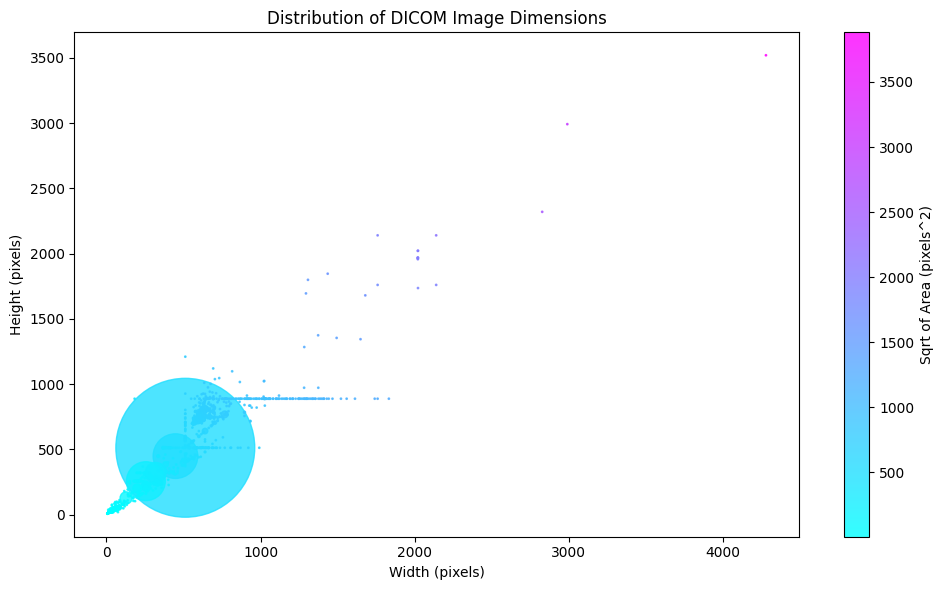

In [6]:
plot_image_shapes(list(dimensions.values()))

In [14]:
subset_768 = {}
for path, dim in dimensions.items():
    if dim[0] <= 768 and dim[1] <= 768:
        subset_768[path] = dim

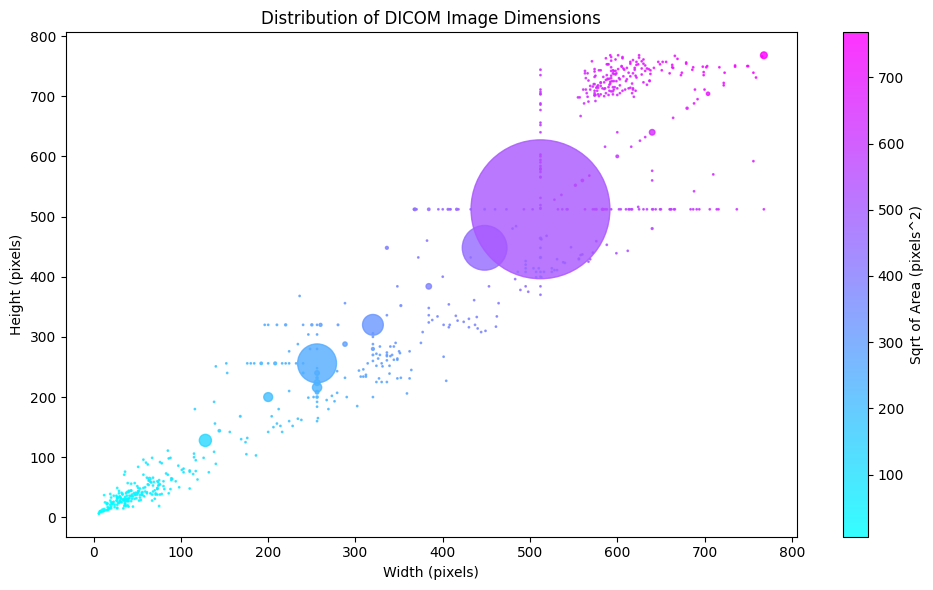

In [18]:
plot_image_shapes(list(subset_768.values()))